# Tethys Entires with Many Attachments

In the meeting with Hayley, Jonathan, and I on 6/25/24, Jonathan mentioned that the "attachments" field of the API will include multiple attachments if multiple exist. 

The aim of this notebook is to investigate this by isolating one or two entries that are known to have many attachments, and finding if they are all provided via the API's "attachments" field.

### Setup

In [21]:
import primrea.core
import pandas as pd
from primrea import *
import numpy as np

In [2]:
primre_data = primrea.core.primrea_data()

### Dev

In [3]:
tethys_df = primre_data.tethys_dataframe

In [4]:
type(tethys_df['attachment'][0])

list

Good! It appears that the 'attachment' field is of type list, which is very helpful if there are multiple included.

From my OneNote (Phase 12, 6/7/24 on):

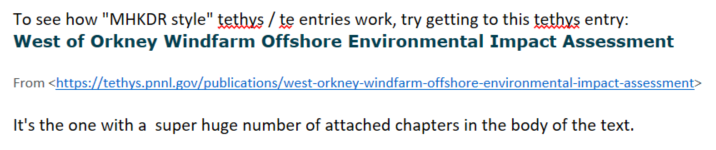

This is the entry that I created with a huge number of attached files, each being a chapter of an EIA. The next task is to isolate this entry in the Tethys data using it's title, and then seeing what the "attachments" field looks like for this Tethys entry.

In [5]:
tethys_df[tethys_df['title']=='West of Orkney Windfarm Offshore Environmental Impact Assessment']

,URI,type,landingPage,sourceURL,title,description,author,organization,originationDate,spatial,technologyType,tags,modifiedDate,signatureProject,attachment


In [6]:
tethys_df[tethys_df['landingPage']=='https://tethys.pnnl.gov/publications/west-orkney-windfarm-offshore-environmental-impact-assessment']

,URI,type,landingPage,sourceURL,title,description,author,organization,originationDate,spatial,technologyType,tags,modifiedDate,signatureProject,attachment


In [7]:
tethys_df[tethys_df['URI']=='https://tethys.pnnl.gov/node/2078849']

,URI,type,landingPage,sourceURL,title,description,author,organization,originationDate,spatial,technologyType,tags,modifiedDate,signatureProject,attachment


In [8]:
tethys_df[tethys_df['URI']=='https://tethys.pnnl.gov/node/499']

,URI,type,landingPage,sourceURL,title,description,author,organization,originationDate,spatial,technologyType,tags,modifiedDate,signatureProject,attachment
0,https://tethys.pnnl.gov/node/499,"[Document, Document/Journal Article]",https://tethys.pnnl.gov/publications/marine-re...,https://www.mdpi.com/1996-1073/10/10/1512/htm,Marine Renewable Energy in the Mediterranean S...,"In this work, an extended overview of the mari...","[Soukissian, T., Denaxa, D., Karathanasi, F., ...","[Hellenic Centre for Marine Research (HCMR), N...",2017-09-29,[],[],"[Environment, Human Dimensions]",2024-01-22 09:24:45,[],[]


I cannot find that particular entry?!

In [9]:
landing_page_uris = list(tethys_df['URI'])
entry_ids = list()
for i in range(0, len(tethys_df)):
    # Construct "entry_id" - This will be a primary key for all future merge operations.
    entry_id = primrea.kh_table_gen.entry_based.find_entry_id(landing_page_uris[i])
    entry_ids.append(entry_id)

In [10]:
tethys_df['entry_id']=entry_ids

In [11]:
pd.set_option('display.max_rows', 500)
tethys_df.sort_values(by='entry_id', ascending=False)[22:24]

,URI,type,landingPage,sourceURL,title,description,author,organization,originationDate,spatial,technologyType,tags,modifiedDate,signatureProject,attachment,entry_id
4232,https://tethys.pnnl.gov/node/2078865,"[Document, Document/Journal Article]",https://tethys.pnnl.gov/publications/emerging-...,https://www.sciencedirect.com/science/article/...,Emerging energy sources' social acceptability:...,Any decrease in global warming and its effects...,"[Ponce Oliva, R., Estay, M., Barrientos, M., E...","[Universidad del Desarrollo, Center of Applied...",2024-07-01,"{'coordinates': ['-34.486800000000', '-71.4854...","[Current, Current/Tidal, Wave]","[Environment, Human Dimensions, Social & Econo...",2024-05-03 11:45:12,[],[],2078865
4231,https://tethys.pnnl.gov/node/2078802,"[Document, Document/Journal Article]",https://tethys.pnnl.gov/publications/good-neig...,https://www.tandfonline.com/doi/abs/10.1080/15...,"Good Neighbours, Public Relations and Bribes: ...",The provision of community benefits has become...,"[Cass, N., Walker, G., Devine-Wright, P.]","[Lancaster University, University of Exeter]",2010-01-01,"{'coordinates': ['54.269957000000', '-2.320451...",[],"[Environment, Human Dimensions, Legal & Policy...",2024-04-24 05:23:17,[],[],2078802


Veritably not included in the data. Likely excluded from the API. Interesting and deserves more attention.

CAUGHT! This observation is wind energy content.

#### Next, try a different method:

In [ ]:
tethys_df['attachment']

In [15]:
num_attchs = list()
for i in range(0, len(tethys_df)):
    num_attch = len(tethys_df['attachment'][i])
    num_attchs.append(num_attch)

In [18]:
unq_num_attchs = set(num_attchs)

In [19]:
unq_num_attchs

{0, 1, 2, 3, 4, 7, 9, 16, 18, 19, 21}

In [113]:
num_obs_w_num_attach = list(np.zeros(22, dtype=np.int8))         # 22 ints, because there are 21 values AND 0, making 22.
for entry in num_attchs:
    for unq_num in unq_num_attchs:
        if entry==unq_num:
            num_obs_w_num_attach[unq_num] += 1

In [114]:
num_obs_w_num_attach

[2173, 2049, 23, 1, 3, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1]

In [31]:
tethys_df['attachment_num']=num_attchs

In [33]:
len(tethys_df[tethys_df['attachment_num']>=2])

33

In [35]:
tethys_df[tethys_df['attachment_num']>=2].head(3)

,URI,type,landingPage,sourceURL,title,description,author,organization,originationDate,spatial,technologyType,tags,modifiedDate,signatureProject,attachment,entry_id,attachment_num
157,https://tethys.pnnl.gov/node/752,"[Document, Document/Report]",https://tethys.pnnl.gov/publications/kyle-rhea...,http://marine.gov.scot/datafiles/lot/Kyle_Rhea...,The Kyle Rhea Tidal Stream Array: Environmenta...,Sea Generation (Kyle Rhea) Ltd is proposing to...,"[Royal Haskoning, Sea Generation (Kyle Rhea) L...",[Royal Haskoning],2013-01-01,"{'coordinates': ['57.235040000000', '-5.663580...","[Current, Current/Tidal]","[Environment, Human Dimensions, Environmental ...",2024-01-22 09:45:33,[],[https://tethys.pnnl.gov/sites/default/files/p...,752,4
216,https://tethys.pnnl.gov/node/861,"[Document, Document/Book Chapter]",https://tethys.pnnl.gov/publications/taking-ac...,https://link.springer.com/chapter/10.1007/978-...,Taking Account of Land-Sea Interactions in Mar...,This chapter reflects on marine/maritime spati...,"[Kidd, S., Jones, H., Jay, S.]",[University of Liverpool],2019-01-24,[],[],"[Environment, Marine Spatial Planning, Human D...",2024-01-22 09:45:33,[],[https://tethys.pnnl.gov/sites/default/files/p...,861,19
713,https://tethys.pnnl.gov/node/2167,"[Document, Document/Journal Article]",https://tethys.pnnl.gov/publications/hydrodyna...,https://www.sciencedirect.com/science/article/...,Hydrodynamic Impacts of a Marine Renewable Ene...,Field measurements of the flow in the benthic ...,"[Fraser, S., Nikora, V., Williamson, B., Scott...",[University of Aberdeen],2017-09-01,"{'coordinates': ['59.150000000000', '-2.800000...","[Current, Current/Tidal]","[Environment, Physical Environment, Changes in...",2024-01-22 09:56:53,[],[https://tethys.pnnl.gov/sites/default/files/p...,2167,2


In [39]:
a = tethys_df[tethys_df['attachment_num']>=2]

In [55]:
b = list(a['attachment'])

In [61]:
b[4]

['https://tethys.pnnl.gov/sites/default/files/publications/Annex-IV-2016-State-of-the-Science-Report_LR.pdf',
 'https://tethys.pnnl.gov/sites/default/files/publications/Annex-IV-2016-State-of-the-Science-Report_MR.pdf',
 'https://tethys.pnnl.gov/sites/default/files/publications/Annex-IV-2016-State-of-the-Science-Report_HR.pdf',
 'https://tethys.pnnl.gov/sites/default/files/publications/SoSExecutiveSummaryFinal_0.pdf',
 'https://tethys.pnnl.gov/sites/default/files/publications/SoSExecutiveSummaryFinal_Chinese_0.pdf',
 'https://tethys.pnnl.gov/sites/default/files/publications/SoSExecutiveSummaryFinal_Japanese_V2_0.pdf',
 'https://tethys.pnnl.gov/sites/default/files/publications/SoSExecutiveSummaryFinal_Norwegian_0.pdf',
 'https://tethys.pnnl.gov/sites/default/files/publications/SoSExecutiveSummaryFinal_Portuguese_0.pdf',
 'https://tethys.pnnl.gov/sites/default/files/publications/SoSExecutiveSummaryFinal_Spanish_0.pdf',
 'https://tethys.pnnl.gov/sites/default/files/publications/SoSExecuti